In [ ]:
import os
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio --unzip

 98% 419M/429M [00:02<00:00, 222MB/s]
100% 429M/429M [00:02<00:00, 198MB/s]


In [ ]:
!kaggle datasets download ejlok1/toronto-emotional-speech-set-tess --unzip

 97% 416M/428M [00:03<00:00, 194MB/s]
100% 428M/428M [00:03<00:00, 137MB/s]


In [ ]:
!kaggle datasets download ejlok1/cremad --unzip

 98% 442M/451M [00:03<00:00, 202MB/s]
100% 451M/451M [00:03<00:00, 137MB/s]


In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess --unzip

 97% 417M/428M [00:02<00:00, 137MB/s]
100% 428M/428M [00:02<00:00, 186MB/s]


In [ ]:
!kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip

 81% 87.0M/107M [00:00<00:00, 153MB/s]
100% 107M/107M [00:00<00:00, 152MB/s] 


In [ ]:
RAVDESS = "audio_speech_actors_01-24/"
CREMA = "AudioWAV/"
TESS = "TESS Toronto emotional speech set data/"
SAVEE = "ALL/"

In [ ]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    # pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.emotion.value_counts())

______________________________________________
                                                   path  emotion
1051  audio_speech_actors_01-24/Actor_08/03-01-06-02...     fear
1052  audio_speech_actors_01-24/Actor_08/03-01-06-01...     fear
1053  audio_speech_actors_01-24/Actor_08/03-01-06-02...     fear
1054  audio_speech_actors_01-24/Actor_08/03-01-07-02...  disgust
1055  audio_speech_actors_01-24/Actor_08/03-01-04-02...      sad
_______________________________________________
sad        192
happy      192
angry      192
disgust    192
fear       192
neutral     96
Name: emotion, dtype: int64


In [ ]:
file_emotion = []
file_path = []
crema_dir_list = os.listdir(CREMA)

for file in crema_dir_list:
    # storing file paths
    file_path.append(CREMA + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        None

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()
print(crema_df.emotion.value_counts())

fear       1271
angry      1271
disgust    1271
happy      1271
sad        1271
neutral    1087
Name: emotion, dtype: int64


In [ ]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}")
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    # pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()
print("______________________________________________")
print(tess_df.tail())
print("_______________________________________________")
print(tess_df.emotion.value_counts())

______________________________________________
                                                   path emotion
2395  TESS Toronto emotional speech set data/YAF_hap...   happy
2396  TESS Toronto emotional speech set data/YAF_hap...   happy
2397  TESS Toronto emotional speech set data/YAF_hap...   happy
2398  TESS Toronto emotional speech set data/YAF_hap...   happy
2399  TESS Toronto emotional speech set data/YAF_hap...   happy
_______________________________________________
angry      400
sad        400
disgust    400
fear       400
neutral    400
happy      400
Name: emotion, dtype: int64


In [ ]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    # pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()
print("______________________________________________")
print(savee_df.tail())
print("_______________________________________________")
print(savee_df.emotion.value_counts())

______________________________________________
                path  emotion
415   ALL/KL_n13.wav  neutral
416   ALL/JE_n05.wav  neutral
417   ALL/DC_n21.wav  neutral
418  ALL/JE_sa14.wav      sad
419  ALL/JE_sa07.wav      sad
_______________________________________________
neutral    120
angry       60
disgust     60
fear        60
happy       60
sad         60
Name: emotion, dtype: int64


In [ ]:
df = pd.concat([
    ravdess_df,
    crema_df,
    tess_df,
    savee_df
], axis=0)
df.head()

,path,emotion
0,audio_speech_actors_01-24/Actor_24/03-01-04-01...,sad
1,audio_speech_actors_01-24/Actor_24/03-01-04-01...,sad
2,audio_speech_actors_01-24/Actor_24/03-01-03-01...,happy
3,audio_speech_actors_01-24/Actor_24/03-01-03-01...,happy
4,audio_speech_actors_01-24/Actor_24/03-01-03-02...,happy


In [ ]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
liczba_plikow = len(df)
print("Liczba plików:", liczba_plikow)


Liczba plików: 11318


In [ ]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment, effects

In [ ]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [ ]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2,
    'angry'   : 3,
    'fear'    : 4,
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

In [ ]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav
Failed for path: ALL/DC_f12.wav
Failed for path: ALL/JK_a01.wav
Failed for path: ALL/KL_sa05.wav
Failed for path: ALL/DC_sa15.wav
Failed for path: ALL/DC_d08.wav
Failed for path: ALL/DC_sa01.wav
Failed for path: ALL/KL_sa15.wav
Failed for path: ALL/JE_sa11.wav
Failed for path: ALL/JE_n11.wav
Failed for path: ALL/DC_d10.wav
Failed for path: ALL/JE_d14.wav
Failed for path: ALL/DC_f11.wav
Failed for path: ALL/JE_sa01.wav
Failed for path: ALL/KL_sa11.wav
Failed for path: ALL/JK_n16.wav
Failed for path: ALL/DC_sa13.wav
Failed for path: ALL/JK_n27.wav
Failed for path: ALL/DC_n11.wav
Failed for path: ALL/JE_f08.wav
Failed for path: ALL/KL_sa14.wav
Failed for path: ALL/JE_n15.wav
Failed for path: ALL/JK_sa02.wav
Failed for path: ALL/JK_d10.wav
Failed for path: ALL/JE_a15.wav
Failed for path: ALL/KL_h15.wav
Failed for path: ALL/JK_n15.wav
Failed for path: ALL/DC_n28.wav
Failed for path: ALL/DC_sa10.wav
Failed for path:

In [ ]:
X.shape

(11199, 352, 15)

In [ ]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2),
    np.swapaxes(rms_list, 1, 2),
    np.swapaxes(mfccs_list, 1, 2)),
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

X_train.shape, X_to_split.shape, y_train.shape, y_to_split.shape, X_val.shape, X_test.shape, y_val.shape, y_test.shape

((9855, 352, 15),
 (1344, 352, 15),
 (9855, 1),
 (1344, 1),
 (940, 352, 15),
 (404, 352, 15),
 (940, 1),
 (404, 1))

In [ ]:
X.shape[1:3]

(352, 15)

In [ ]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [ ]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 53894 (210.52 KB)
Trainable params: 53894 (210.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=300, batch_size=6, validation_data=(X_val, y_val_class))

Epoch 1/300
1643/1643 [==============================] - 40s 22ms/step - loss: 1.6193 - categorical_accuracy: 0.3142 - val_loss: 1.5820 - val_categorical_accuracy: 0.3372
Epoch 2/300
1643/1643 [==============================] - 37s 22ms/step - loss: 1.5592 - categorical_accuracy: 0.3445 - val_loss: 1.5626 - val_categorical_accuracy: 0.3436
Epoch 3/300
1643/1643 [==============================] - 36s 22ms/step - loss: 1.5138 - categorical_accuracy: 0.3722 - val_loss: 1.5428 - val_categorical_accuracy: 0.3553
Epoch 4/300
1643/1643 [==============================] - 37s 23ms/step - loss: 1.4910 - categorical_accuracy: 0.3748 - val_loss: 1.5230 - val_categorical_accuracy: 0.3681
Epoch 5/300
1643/1643 [==============================] - 36s 22ms/step - loss: 1.4462 - categorical_accuracy: 0.4007 - val_loss: 1.4673 - val_categorical_accuracy: 0.4043
Epoch 6/300
1643/1643 [==============================] - 37s 23ms/step - loss: 1.4228 - categorical_accuracy: 0.4135 - val_loss: 1.5877 - val_cat

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = MODEL.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
MODEL.save_weights("LSTM_model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from sklearn.metrics import confusion_matrix

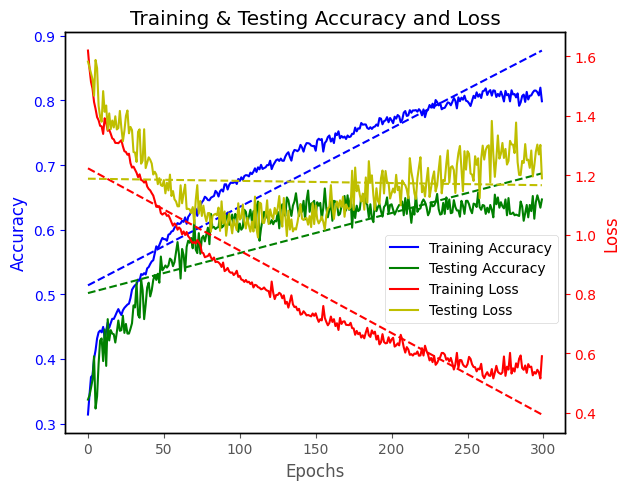

In [ ]:
# print("Accuracy of our model on test data : " , MODEL.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(300)]
# fig, ax = plt.subplots(figsize=(20, 6))
train_acc = model.history['categorical_accuracy']
train_loss = model.history['loss']
test_acc = model.history['val_categorical_accuracy']
test_loss = model.history['val_loss']
fig, ax1 = plt.subplots()

# Wykresy dla dokładności
ax1.plot(epochs, train_acc, label='Training Accuracy', color='b')
ax1.plot(epochs, test_acc, label='Testing Accuracy', color='g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')

# Trend lines for accuracy
z_train_acc = np.polyfit(epochs, train_acc, 1)
p_train_acc = np.poly1d(z_train_acc)
ax1.plot(epochs, p_train_acc(epochs), linestyle="--", color='b')

z_test_acc = np.polyfit(epochs, test_acc, 1)
p_test_acc = np.poly1d(z_test_acc)
ax1.plot(epochs, p_test_acc(epochs), linestyle="--", color='g')

# Druga oś Y dla straty
ax2 = ax1.twinx()
ax2.plot(epochs, train_loss, label='Training Loss', color='r')
ax2.plot(epochs, test_loss, label='Testing Loss', color='y')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')

# Trend lines for loss
z_train_loss = np.polyfit(epochs, train_loss, 1)
p_train_loss = np.poly1d(z_train_loss)
ax2.plot(epochs, p_train_loss(epochs), linestyle="--", color='r')

z_test_loss = np.polyfit(epochs, test_loss, 1)
p_test_loss = np.poly1d(z_test_loss)
ax2.plot(epochs, p_test_loss(epochs), linestyle="--", color='y')


ax1.set_facecolor('white')  # Ustawienie białego tła
ax1.grid(False)  # Usunięcie siatki
ax2.set_facecolor('white')  # Ustawienie białego tła
ax2.grid(False)  # Usunięcie siatki

for spine in ax1.spines.values():
    spine.set_edgecolor('black')
for spine in ax2.spines.values():
    spine.set_edgecolor('black')


# fi.legend(['Training', 'Validation'], frameon=True, facecolor='white')
# # Dla osi drugiego wykresu (accuracy)
# ax2.legend(['Training', 'Validation'], frameon=True, facecolor='white')

fig.tight_layout()
plt.title('Training & Testing Accuracy and Loss')
fig.legend(loc='center right', bbox_to_anchor=(0.89, 0.45), frameon=True, facecolor='white')
plt.show()

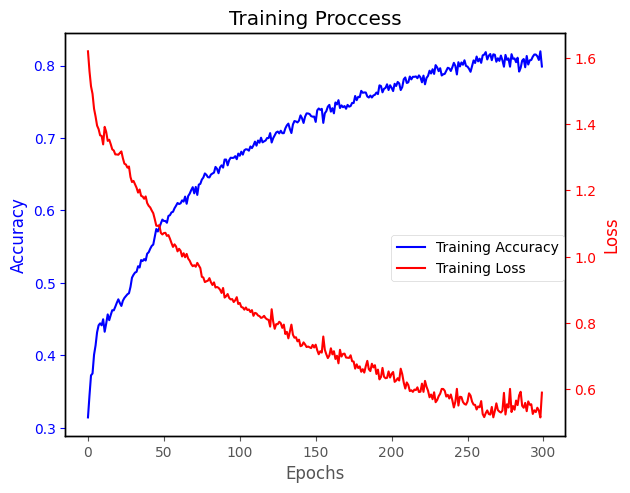

In [ ]:
fig, ax1 = plt.subplots()

# Wykresy dla dokładności
ax2 = ax1.twinx()
ax1.plot(epochs, train_acc, label='Training Accuracy', color='b')

ax2.plot(epochs, train_loss, label='Training Loss', color='r')
# ax1.plot(epochs, test_acc, label='Testing Accuracy', color='g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')

ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')

for spine in ax1.spines.values():
    spine.set_edgecolor('black')

for spine in ax2.spines.values():
    spine.set_edgecolor('black')

ax1.set_facecolor('white')  # Ustawienie białego tła
ax1.grid(False)  # Usunięcie siatki
ax2.set_facecolor('white')  # Ustawienie białego tła
ax2.grid(False)  # Usunięcie siatki
fig.tight_layout()
plt.title('Training Proccess')
fig.legend(loc='center right', bbox_to_anchor=(0.9, 0.5), facecolor='white')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładając, że history to obiekt historii treningu modelu Keras
epochs = [i for i in range(len(model.history['loss']))]  # Dostosuj do liczby epok
fig, ax = plt.subplots(1, 2, figsize=(40, 12))

# Strata (Loss)
train_loss = model.history['loss']
test_loss = model.history['val_loss']
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
# Linie trendu dla straty
z_train_loss = np.polyfit(epochs, train_loss, 1)
p_train_loss = np.poly1d(z_train_loss)
ax[0].plot(epochs, p_train_loss(epochs), linestyle="--", label='Trend Training Loss')
z_test_loss = np.polyfit(epochs, test_loss, 1)
p_test_loss = np.poly1d(z_test_loss)
ax[0].plot(epochs, p_test_loss(epochs), linestyle="--", label='Trend Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Dokładność (Accuracy)
train_acc = model.history['categorical_accuracy']  # Zmień na 'accuracy' zamiast 'categorical_accuracy'
test_acc = model.history['val_categorical_accuracy']  # Zmień na 'val_accuracy' zamiast 'val_categorical_accuracy'
ax[0].plot(epochs, train_acc, label='Training Accuracy')
ax[0].plot(epochs, test_acc, label='Testing Accuracy')
# Linie trendu dla dokładności
z_train_acc = np.polyfit(epochs, train_acc, 1)
p_train_acc = np.poly1d(z_train_acc)
ax[0].plot(epochs, p_train_acc(epochs), linestyle="--", label='Trend Training Accuracy')
z_test_acc = np.polyfit(epochs, test_acc, 1)
p_test_acc = np.poly1d(z_test_acc)
ax[0].plot(epochs, p_test_acc(epochs), linestyle="--", label='Trend Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[1].set_xlabel("Epochs")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (6, 4))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.0f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('Actual Labels', size=15)
plt.show()
print(classification_report(y_test0, y_pred0))

30/30 [==============================] - 1s 26ms/step


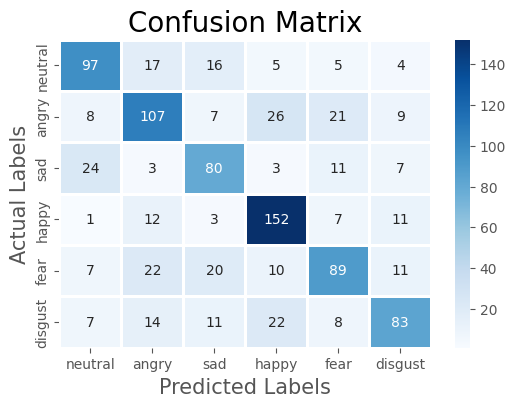

In [ ]:
import seaborn as sns
import numpy as np

plt.figure(figsize = (6, 4))
y_pred = np.argmax(MODEL.predict(X_val), axis=1)
labels = ['neutral', 'angry', 'sad', 'happy', 'fear', 'disgust']
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.0f',  xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('Actual Labels', size=15)
plt.show()